# IST 707 Final Project - 
# Emotion Detection from Facial Expressions

# NAIVE CLASSIFIERS

# 1. Imports

In [1]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier

# 2. Load Dataset and PreProcess

In [2]:
data=pd.read_csv('icml_face_data.csv')
data.head()

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [3]:
data['pixels'] = data[' pixels'].apply(lambda x: list(map(int, x.split())))

In [4]:
data = data.join(data['pixels'].apply(pd.Series).add_prefix('pixel_'))
data = data.drop([' pixels','pixels'],axis=1)

In [5]:
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

<Axes: >

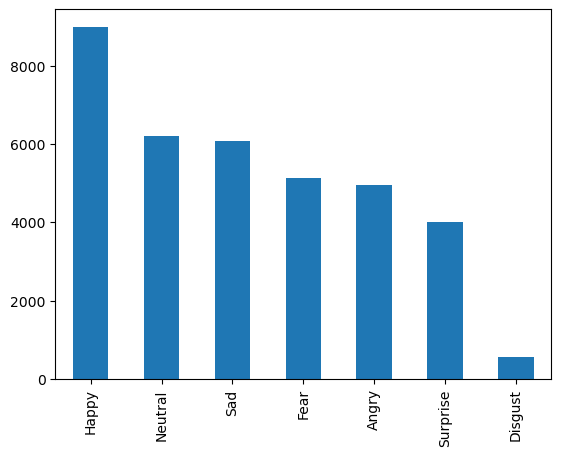

In [6]:
data['real_emotion']=data['emotion'].map(emotions)
data['real_emotion'].value_counts().plot(kind='bar')

<Axes: >

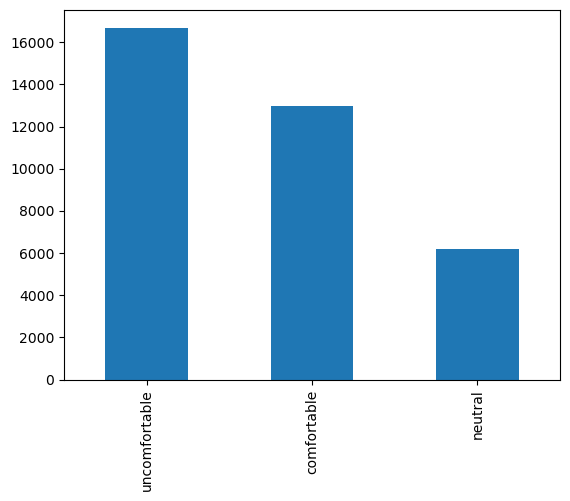

In [7]:
new_emotions={0:'uncomfortable', 1:'uncomfortable',2:'uncomfortable',
              3:'comfortable', 4:'uncomfortable', 5:'comfortable', 6:'neutral'}

data['new_emotion'] = data['emotion'].replace(new_emotions)
data['new_emotion'].value_counts().plot(kind='bar')

In [8]:
new_emotion_code={'neutral':0,'comfortable':1,'uncomfortable':2}
data['emotion_code']= data['new_emotion'].map(new_emotion_code)

In [9]:
data1=data.drop(['real_emotion','new_emotion','emotion',' Usage'],axis=1)

## 2a. Standard Scaler

In [10]:
emco=data['emotion_code']

dfStd = data1.drop(['emotion_code'],axis=1)

In [11]:
dfStd.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_2294,pixel_2295,pixel_2296,pixel_2297,pixel_2298,pixel_2299,pixel_2300,pixel_2301,pixel_2302,pixel_2303
0,70,80,82,72,58,58,60,63,54,58,...,159,182,183,136,106,116,95,106,109,82
1,151,150,147,155,148,133,111,140,170,174,...,105,108,95,108,102,67,171,193,183,184
2,231,212,156,164,174,138,161,173,182,200,...,104,138,152,122,114,101,97,88,110,152
3,24,32,36,30,32,23,19,20,30,41,...,174,126,132,132,133,136,139,142,143,142
4,4,0,0,0,0,0,0,0,0,0,...,12,34,31,31,31,27,31,30,29,30


In [12]:
scaledFeat=StandardScaler().fit_transform(dfStd.values)

dfStd=pd.DataFrame(scaledFeat, index=dfStd.index,columns=dfStd.columns)
dfStd['emotion_code']=emco
dfStd.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_2295,pixel_2296,pixel_2297,pixel_2298,pixel_2299,pixel_2300,pixel_2301,pixel_2302,pixel_2303,emotion_code
0,-0.606470,-0.456207,-0.401105,-0.504562,-0.670675,-0.665695,-0.641047,-0.608718,-0.756215,-0.730926,...,1.007612,1.010337,0.352180,-0.062731,0.065810,-0.218377,-0.087146,-0.057888,-0.411975,2
1,0.375875,0.407967,0.414223,0.557216,0.506432,0.337948,0.056796,0.466766,0.893108,0.941302,...,-0.030063,-0.206225,-0.028694,-0.116259,-0.582313,0.774692,1.035376,0.889117,0.883013,2
2,1.346093,1.173378,0.527114,0.672349,0.846485,0.404857,0.740955,0.927688,1.063728,1.316111,...,0.390616,0.581775,0.161743,0.044325,-0.132595,-0.192244,-0.319392,-0.045090,0.476742,2
3,-1.164345,-1.048783,-0.978106,-1.041847,-1.010728,-1.134061,-1.202057,-1.209313,-1.097454,-0.975994,...,0.222345,0.305284,0.297769,0.298583,0.330350,0.356557,0.377346,0.377223,0.349783,2
4,-1.406899,-1.443834,-1.429672,-1.425622,-1.429254,-1.441845,-1.462038,-1.488659,-1.524003,-1.567040,...,-1.067738,-1.090996,-1.076096,-1.066379,-1.111393,-1.054646,-1.067739,-1.081677,-1.072166,0


## 2b. Division Scaling

In [13]:
dfScaled = data1.drop('emotion_code',axis=1)

In [14]:
dfScaled=dfScaled/255

dfScaled['emotion_code']=emco
dfScaled.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_2295,pixel_2296,pixel_2297,pixel_2298,pixel_2299,pixel_2300,pixel_2301,pixel_2302,pixel_2303,emotion_code
0,0.274510,0.313725,0.321569,0.282353,0.227451,0.227451,0.235294,0.247059,0.211765,0.227451,...,0.713725,0.717647,0.533333,0.415686,0.454902,0.372549,0.415686,0.427451,0.321569,2
1,0.592157,0.588235,0.576471,0.607843,0.580392,0.521569,0.435294,0.549020,0.666667,0.682353,...,0.423529,0.372549,0.423529,0.400000,0.262745,0.670588,0.756863,0.717647,0.721569,2
2,0.905882,0.831373,0.611765,0.643137,0.682353,0.541176,0.631373,0.678431,0.713725,0.784314,...,0.541176,0.596078,0.478431,0.447059,0.396078,0.380392,0.345098,0.431373,0.596078,2
3,0.094118,0.125490,0.141176,0.117647,0.125490,0.090196,0.074510,0.078431,0.117647,0.160784,...,0.494118,0.517647,0.517647,0.521569,0.533333,0.545098,0.556863,0.560784,0.556863,2
4,0.015686,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.133333,0.121569,0.121569,0.121569,0.105882,0.121569,0.117647,0.113725,0.117647,0


## 2c. Sub Sample
### To resolve class distribution imbalances

In [15]:
np.random.seed(123)

c2 = data1[data1['emotion_code'] == 2]
c1 = data1[data1['emotion_code'] == 1]
c0 = data1[data1['emotion_code'] == 0]

c2_1 = dfStd[dfStd['emotion_code'] == 2]
c1_1 = dfStd[dfStd['emotion_code'] == 1]
c0_1 = dfStd[dfStd['emotion_code'] == 0]

c2_2 = dfScaled[dfScaled['emotion_code'] == 2]
c1_2 = dfScaled[dfScaled['emotion_code'] == 1]
c0_2 = dfScaled[dfScaled['emotion_code'] == 0]


In [16]:
C_2 = c2.sample(3000)
C_1 = c1.sample(3000)
C_0 = c0.sample(3000)

C_2_1 = c2_1.sample(3000)
C_1_1 = c1_1.sample(3000)
C_0_1 = c0_1.sample(3000)

C_2_2 = c2_2.sample(3000)
C_1_2= c1_2.sample(3000)
C_0_2 = c0_2.sample(3000)

In [17]:
df = pd.concat([C_0,C_1,C_2], axis=0)
df = pd.DataFrame(df)

dfStd = pd.concat([C_0_1,C_1_1,C_2_1], axis=0)
dfStd = pd.DataFrame(dfStd)

dfScaled = pd.concat([C_0_2,C_1_2,C_2_2], axis=0)
dfScaled= pd.DataFrame(dfScaled)

# 3. Create Train Test Split

## These will be the Three DataFrames to create models

In [18]:
y=df['emotion_code']
X=df.drop('emotion_code',axis=1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [20]:
y_std=dfStd['emotion_code']
X_std=dfStd.drop('emotion_code',axis=1)

In [21]:
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(
    X_std, y_std, test_size=0.2, random_state=42)

In [22]:
yScale=dfScaled['emotion_code']
XScale=dfScaled.drop('emotion_code',axis=1)

In [23]:
X_train_Scale, X_test_Scale, y_train_Scale, y_test_Scale = train_test_split(
    XScale, yScale, test_size=0.2, random_state=42)

# 4. Untuned Decision Tree

## 4a. Unscaled Data

In [24]:
dt = DecisionTreeClassifier(random_state=123)

In [68]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=123)

In [69]:
pred_dt=dt.predict(X_test)

Accuracy for base Decision Tree  0.42277777777777775


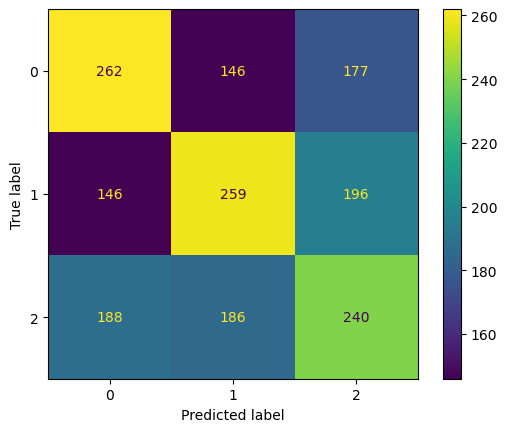

In [70]:
print("Accuracy for base Decision Tree ",accuracy_score(y_test,pred_dt))
ConfusionMatrixDisplay.from_predictions(y_test, pred_dt)
plt.show()

## 4b. Standardized Data

In [71]:
dt.fit(X_train_std,y_train_std)

DecisionTreeClassifier(random_state=123)

In [72]:
pred_dt_std=dt.predict(X_test_std)

Accuracy for base Decision Tree  0.4022222222222222


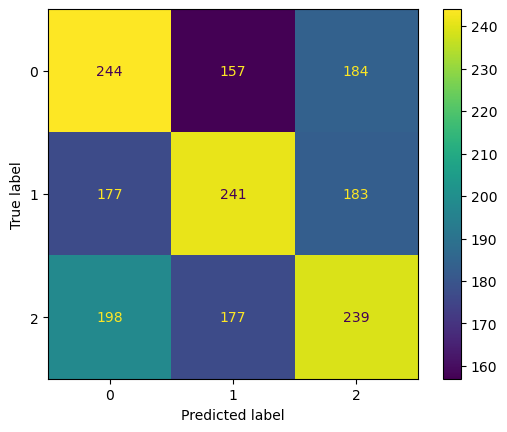

In [73]:
print("Accuracy for base Decision Tree ",accuracy_score(y_test_std,pred_dt_std))
ConfusionMatrixDisplay.from_predictions(y_test_std, pred_dt_std)
plt.show()

## 4c. Divisioned Data

In [75]:
dt.fit(X_train_Scale,y_train_Scale)

DecisionTreeClassifier(random_state=123)

In [76]:
pred_dt_Scale=dt.predict(X_test_Scale)

Accuracy for base Decision Tree  0.42333333333333334


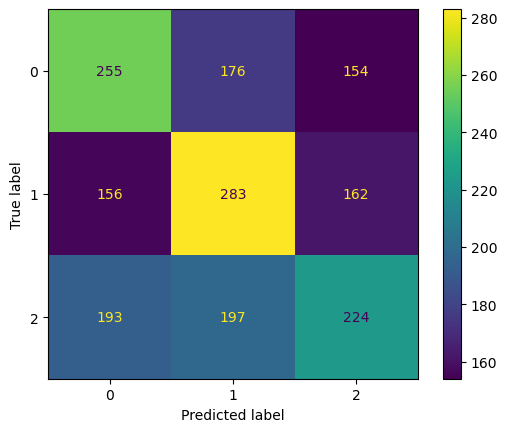

In [77]:
print("Accuracy for base Decision Tree ",accuracy_score(y_test_Scale,pred_dt_Scale))
ConfusionMatrixDisplay.from_predictions(y_test_Scale, pred_dt_Scale)
plt.show()

# 5. Tuned Decision Tree

## 5a. Unscaled Data

In [41]:
param_grid_dt = {
    'max_depth' : [10,15,20,25,30,35,None],
    'criterion' :['gini', 'entropy','log_loss'],
}

In [27]:
CV_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv= 5,n_jobs=-1)
CV_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 15, 20, 25, 30, 35]})

In [28]:
print(f'Best Params: {CV_dt.best_params_}')
print(f'Best Score: {CV_dt.best_score_}')

Best Params: {'criterion': 'gini', 'max_depth': 20}
Best Score: 0.41680555555555554


In [29]:
dt_tuned = DecisionTreeClassifier(criterion='gini',
                                  max_depth=20,
                                  random_state=123
                                 )

In [30]:
dt_tuned.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=20, random_state=123)

In [31]:
pred_dt_tuned=dt_tuned.predict(X_test)

Accuracy for base Decision Tree  0.40444444444444444


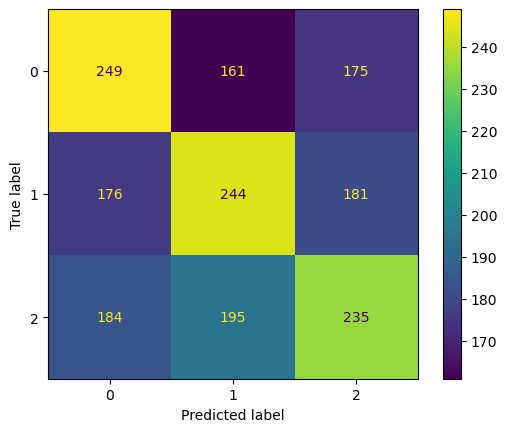

In [32]:
print("Accuracy for base Decision Tree ",accuracy_score(y_test,pred_dt_tuned))
ConfusionMatrixDisplay.from_predictions(y_test, pred_dt_tuned)
plt.show()

## 5b. Standardized Data

In [33]:
CV_dt_std = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv= 5,n_jobs=-1)
CV_dt_std.fit(X_train_std, y_train_std)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 15, 20, 25, 30, 35]})

In [34]:
print(f'Best Params: {CV_dt_std.best_params_}')
print(f'Best Score: {CV_dt_std.best_score_}')

Best Params: {'criterion': 'entropy', 'max_depth': 10}
Best Score: 0.42125


In [35]:
dt_std_tuned = DecisionTreeClassifier(criterion='entropy',
                                  max_depth=10,
                                  random_state=123
                                 )

In [38]:
dt_std_tuned.fit(X_train_std,y_train_std)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=123)

In [39]:
pred_dt_std_tuned=dt_std_tuned.predict(X_test_std)

Accuracy for base Decision Tree  0.4


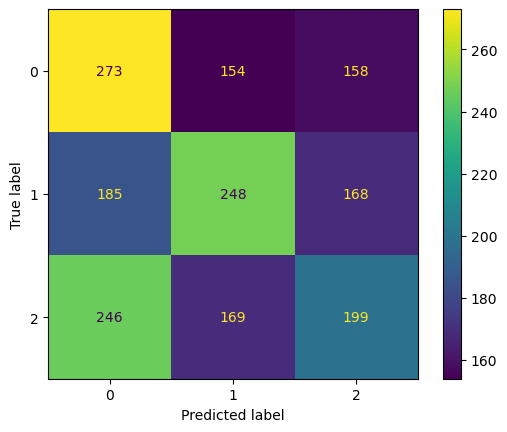

In [40]:
print("Accuracy for base Decision Tree ",accuracy_score(y_test_std,pred_dt_std_tuned))
ConfusionMatrixDisplay.from_predictions(y_test_std, pred_dt_std_tuned)
plt.show()

## 5c. Divisioned Data

In [42]:
CV_dt_scale = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv= 5,n_jobs=-1)
CV_dt_scale.fit(X_train_Scale, y_train_Scale)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 15, 20, 25, 30, 35, None]})

In [43]:
print(f'Best Params: {CV_dt_scale.best_params_}')
print(f'Best Score: {CV_dt_scale.best_score_}')

Best Params: {'criterion': 'gini', 'max_depth': 10}
Best Score: 0.4031944444444445


In [44]:
dt_scale_tuned = DecisionTreeClassifier(criterion='gini',
                                  max_depth=10,
                                  random_state=123
                                 )

In [45]:
dt_scale_tuned.fit(X_train_Scale,y_train_Scale)

DecisionTreeClassifier(max_depth=10, random_state=123)

In [46]:
pred_dt_scale_tuned=dt_scale_tuned.predict(X_test_Scale)

Accuracy for base Decision Tree  0.41888888888888887


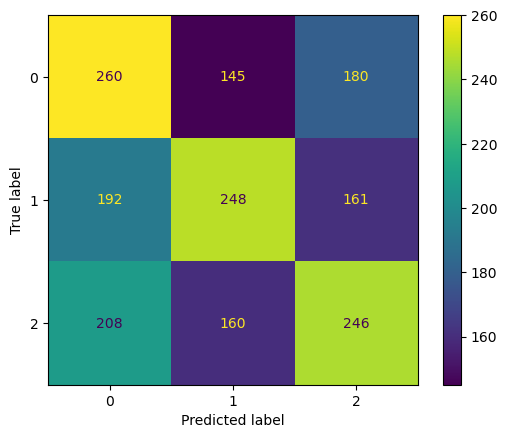

In [47]:
print("Accuracy for base Decision Tree ",accuracy_score(y_test_Scale,pred_dt_scale_tuned))
ConfusionMatrixDisplay.from_predictions(y_test_Scale, pred_dt_scale_tuned)
plt.show()

# 6. Untuned Random Forest

## 6a. Unscaled Data

In [75]:
rf = RandomForestClassifier(random_state=123,
                           n_jobs=-1)

In [81]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=123)

In [82]:
pred_rf=rf.predict(X_test)

Accuracy for base Random Forest  0.5122222222222222


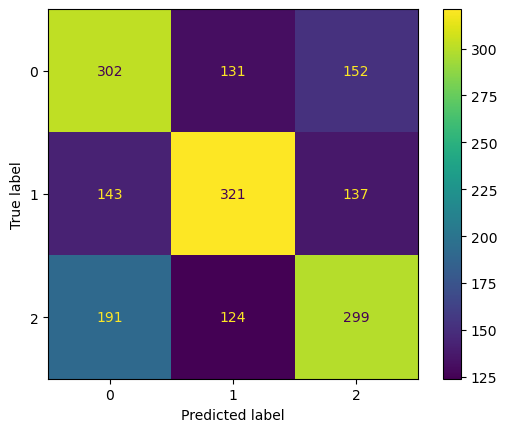

In [83]:
print("Accuracy for base Random Forest ",accuracy_score(y_test,pred_rf))
ConfusionMatrixDisplay.from_predictions(y_test, pred_rf)
plt.show()

## 6b. Standardized Data

In [85]:
rfStd = RandomForestClassifier(random_state=123,
                              n_jobs=-1)

In [86]:
rfStd.fit(X_train_std,y_train_std)

RandomForestClassifier(n_jobs=-1, random_state=123)

In [88]:
pred_rf_std=rfStd.predict(X_test_std)

Accuracy for base Random Forest  0.52


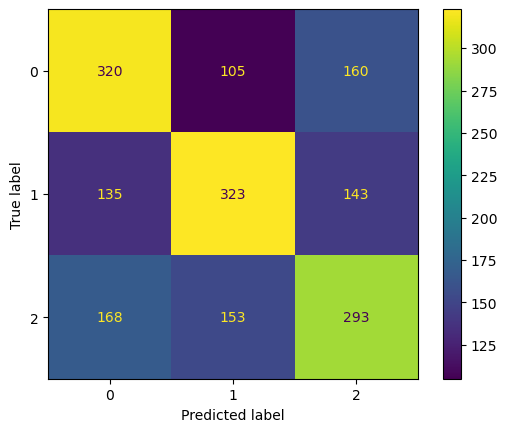

In [89]:
print("Accuracy for base Random Forest ",accuracy_score(y_test_std,pred_rf_std))
ConfusionMatrixDisplay.from_predictions(y_test_std, pred_rf_std)
plt.show()

## 6c. Divisioned Data

In [91]:
rfScale = RandomForestClassifier(random_state=123,
                              n_jobs=-1)

In [93]:
rfScale.fit(X_train_Scale,y_train_Scale)

RandomForestClassifier(n_jobs=-1, random_state=123)

In [94]:
pred_rf_scale = rfScale.predict(X_test_Scale)

Accuracy for base Random Forest  0.5055555555555555


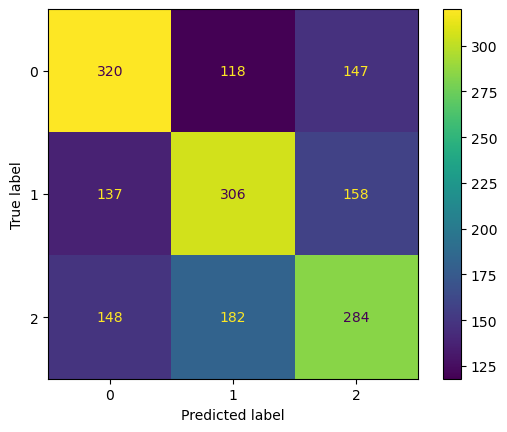

In [95]:
print("Accuracy for base Random Forest ",accuracy_score(y_test_Scale,pred_rf_scale))
ConfusionMatrixDisplay.from_predictions(y_test_Scale, pred_rf_scale)
plt.show()

# 7. Tuned Random Forest

## 7a. Unscaled Data

In [24]:
rf=RandomForestClassifier(random_state=123)

In [25]:
param_grid_rf = {'max_features':[.25,.5,'sqrt','log2'],
                'criterion':['gini','entropy','log_loss'],
                'n_estimators':[100,250,500,750],
                'max_samples':[.25,.5,.75]}

In [27]:
CV_rf = GridSearchCV(rf, param_grid=param_grid_rf, 
                         cv= 3, n_jobs=-1)

CV_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': [0.25, 0.5, 'sqrt', 'log2'],
                         'max_samples': [0.25, 0.5, 0.75],
                         'n_estimators': [100, 250, 500, 750]})

In [28]:
print(f'Best Params: {CV_rf.best_params_}')
print(f'Best Score: {CV_rf.best_score_}')

Best Params: {'criterion': 'entropy', 'max_features': 0.25, 'max_samples': 0.75, 'n_estimators': 750}
Best Score: 0.5216666666666666


In [32]:
rf_tuned=RandomForestClassifier(random_state=123,
                                n_jobs=-1,
                                max_features=0.25,
                                criterion='entropy',
                                n_estimators=750,
                                max_samples=0.75
)

In [33]:
rf_tuned.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_features=0.25, max_samples=0.75,
                       n_estimators=750, n_jobs=-1, random_state=123)

In [34]:
pred_rf_tuned=rf_tuned.predict(X_test)

Accuracy for tuned Random Forest  0.5388888888888889


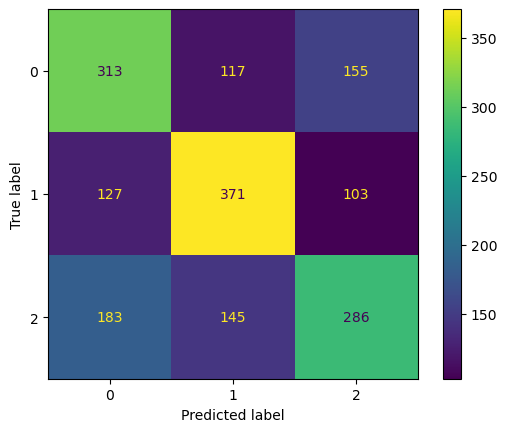

In [35]:
print("Accuracy for tuned Random Forest ",accuracy_score(y_test,pred_rf_tuned))
ConfusionMatrixDisplay.from_predictions(y_test, pred_rf_tuned)
plt.show()

## 7b. Standardized Data

In [26]:
CV_rf_std = GridSearchCV(rf, param_grid=param_grid_rf, 
                         cv= 3, n_jobs=-1)

CV_rf_std.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': [0.25, 0.5, 'sqrt', 'log2'],
                         'max_samples': [0.25, 0.5, 0.75],
                         'n_estimators': [100, 250, 500, 750]})

In [27]:
print(f'Best Params: {CV_rf_std.best_params_}')
print(f'Best Score: {CV_rf_std.best_score_}')

Best Params: {'criterion': 'entropy', 'max_features': 0.5, 'max_samples': 0.75, 'n_estimators': 750}
Best Score: 0.5272222222222221


In [28]:
rf_std_tuned=RandomForestClassifier(random_state=123,
                                n_jobs=-1,
                                max_features=0.5,
                                criterion='entropy',
                                n_estimators=750,
                                max_samples=0.75
)

In [29]:
rf_std_tuned.fit(X_train_std,y_train_std)

RandomForestClassifier(criterion='entropy', max_features=0.5, max_samples=0.75,
                       n_estimators=750, n_jobs=-1, random_state=123)

In [30]:
pred_rf_std_tuned=rf_std_tuned.predict(X_test_std)

Accuracy for tuned Random Forest  0.5455555555555556


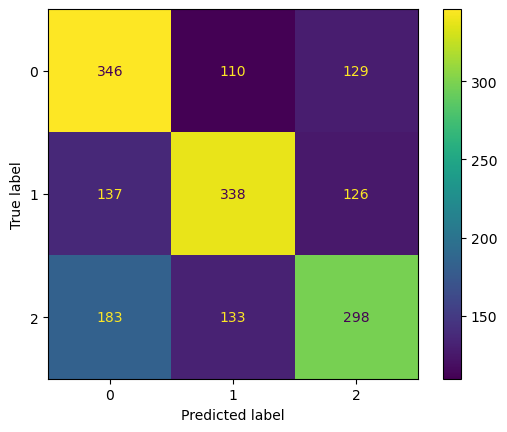

In [31]:
print("Accuracy for tuned Random Forest ",accuracy_score(y_test_std,pred_rf_std_tuned))
ConfusionMatrixDisplay.from_predictions(y_test_std, pred_rf_std_tuned)
plt.show()

## 7c. Divisioned Data

In [32]:
CV_rf_scale = GridSearchCV(rf, param_grid=param_grid_rf, 
                         cv= 3, n_jobs=-1)

CV_rf_scale.fit(X_train_Scale, y_train_Scale)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': [0.25, 0.5, 'sqrt', 'log2'],
                         'max_samples': [0.25, 0.5, 0.75],
                         'n_estimators': [100, 250, 500, 750]})

In [33]:
print(f'Best Params: {CV_rf_scale.best_params_}')
print(f'Best Score: {CV_rf_scale.best_score_}')

Best Params: {'criterion': 'gini', 'max_features': 0.5, 'max_samples': 0.75, 'n_estimators': 250}
Best Score: 0.5256944444444445


In [34]:
rf_scale_tuned=RandomForestClassifier(random_state=123,
                                n_jobs=-1,
                                max_features=0.5,
                                criterion='gini',
                                n_estimators=250,
                                max_samples=0.75
)

In [35]:
rf_scale_tuned.fit(X_train_Scale,y_train_Scale)

RandomForestClassifier(max_features=0.5, max_samples=0.75, n_estimators=250,
                       n_jobs=-1, random_state=123)

In [36]:
pred_rf_scale_tuned=rf_scale_tuned.predict(X_test_Scale)

Accuracy for tuned Random Forest  0.5161111111111111


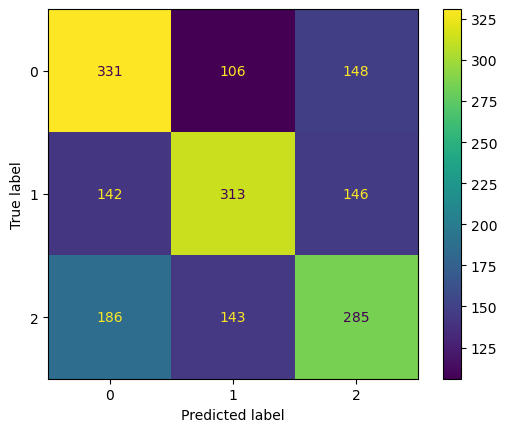

In [37]:
print("Accuracy for tuned Random Forest ",accuracy_score(y_test_Scale,pred_rf_scale_tuned))
ConfusionMatrixDisplay.from_predictions(y_test_Scale, pred_rf_scale_tuned)
plt.show()

# 8. Untuned SVM

## 8a. Unscaled Data

In [97]:
svm = SVC(random_state=123)

In [98]:
svm.fit(X_train,y_train)

SVC(random_state=123)

In [99]:
pred_svm=svm.predict(X_test)

Accuracy for base SVM 0.53


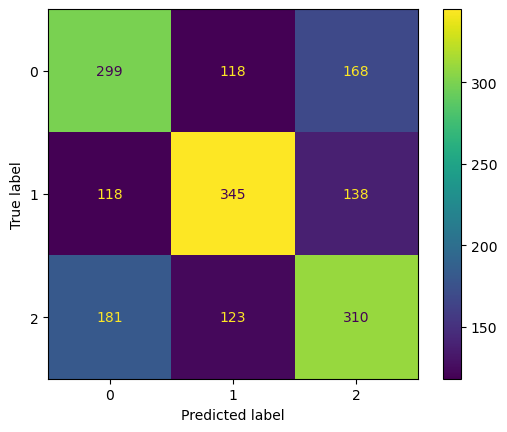

In [100]:
print("Accuracy for base SVM",accuracy_score(y_test,pred_svm))
ConfusionMatrixDisplay.from_predictions(y_test, pred_svm)
plt.show()

## 8b. Standardized Data

In [101]:
svmStd=SVC(random_state=123)

In [102]:
svmStd.fit(X_train_std,y_train_std)

SVC(random_state=123)

In [109]:
pred_svm_std = svmStd.predict(X_test_std)

Accuracy for base SVM  0.53


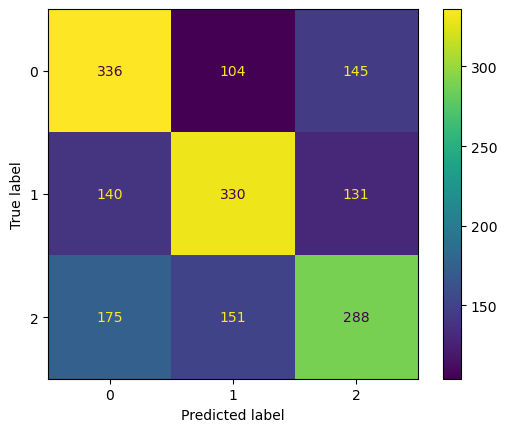

In [110]:
print("Accuracy for base SVM ",accuracy_score(y_test_std,pred_svm_std))
ConfusionMatrixDisplay.from_predictions(y_test_std, pred_svm_std)
plt.show()

## 8c. Divisioned Data

In [105]:
svmScale=SVC(random_state=123)

In [106]:
svmScale.fit(X_train_Scale,y_train_Scale)

SVC(random_state=123)

In [107]:
pred_svm_scale=svmScale.predict(X_test_Scale)

Accuracy for base SVM  0.5172222222222222


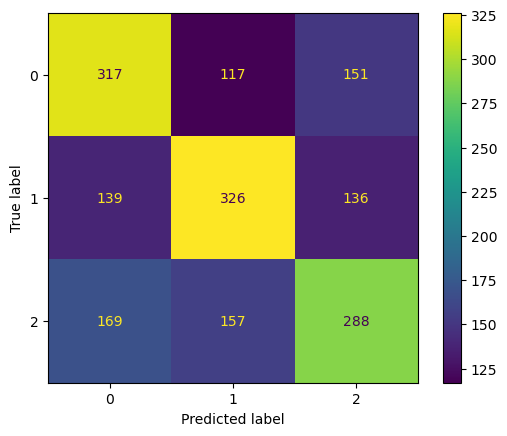

In [108]:
print("Accuracy for base SVM ",accuracy_score(y_test_Scale,pred_svm_scale))
ConfusionMatrixDisplay.from_predictions(y_test_Scale, pred_svm_scale)
plt.show()

# 9. Gradient Boosted Trees

## 9a. Unscaled Data

In [38]:
gbt=GradientBoostingClassifier(random_state=123,
                                 verbose=1)

In [39]:
gbt.fit(X_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           1.0892            9.55m
         2           1.0805            9.44m
         3           1.0722            9.37m
         4           1.0639            9.31m
         5           1.0565            9.26m
         6           1.0495            9.16m
         7           1.0432            9.08m
         8           1.0367            8.98m
         9           1.0305            8.89m
        10           1.0243            8.79m
        20           0.9753            7.81m
        30           0.9358            6.83m
        40           0.9033            5.84m
        50           0.8752            4.86m
        60           0.8487            3.89m
        70           0.8240            2.92m
        80           0.8029            1.94m
        90           0.7810           58.27s
       100           0.7599            0.00s


GradientBoostingClassifier(random_state=123, verbose=1)

In [41]:
pred_gbt=gbt.predict(X_test)

Accuracy for Gradient Boosted Tree  0.5061111111111111


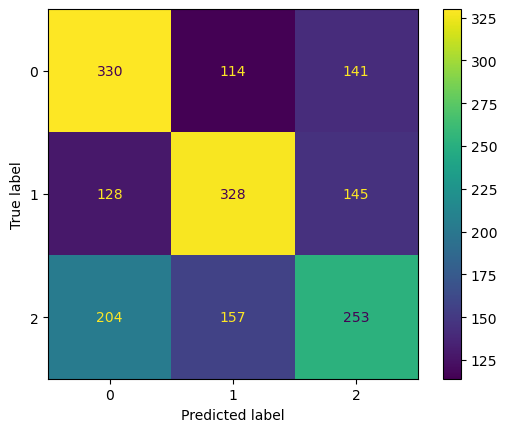

In [42]:
print("Accuracy for Gradient Boosted Tree ",accuracy_score(y_test,pred_gbt))
ConfusionMatrixDisplay.from_predictions(y_test, pred_gbt)
plt.show()

## 9b. Standardized Data

In [43]:
gbt.fit(X_train_std,y_train_std)

      Iter       Train Loss   Remaining Time 
         1           1.0895            9.75m
         2           1.0810            9.62m
         3           1.0729            9.53m
         4           1.0654            9.44m
         5           1.0586            9.34m
         6           1.0515            9.49m
         7           1.0451            9.38m
         8           1.0390            9.24m
         9           1.0331            9.12m
        10           1.0275            8.99m
        20           0.9794            7.91m
        30           0.9416            6.88m
        40           0.9107            5.88m
        50           0.8832            4.89m
        60           0.8587            3.91m
        70           0.8336            2.93m
        80           0.8116            1.95m
        90           0.7912           58.43s
       100           0.7698            0.00s


GradientBoostingClassifier(random_state=123, verbose=1)

In [44]:
pred_gbt_std=gbt.predict(X_test_std)

Accuracy for Gradient Boosted Tree  0.5194444444444445


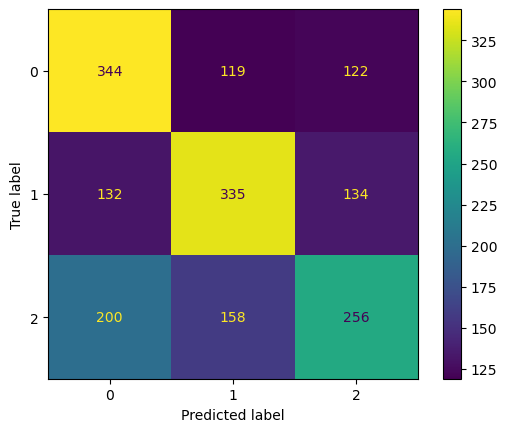

In [45]:
print("Accuracy for Gradient Boosted Tree ",accuracy_score(y_test_std,pred_gbt_std))
ConfusionMatrixDisplay.from_predictions(y_test_std, pred_gbt_std)
plt.show()

## 9c. Divisioned Data

In [46]:
gbt.fit(X_train_Scale,y_train_Scale)

      Iter       Train Loss   Remaining Time 
         1           1.0893            9.79m
         2           1.0807            9.64m
         3           1.0723            9.55m
         4           1.0648            9.43m
         5           1.0577            9.33m
         6           1.0511            9.23m
         7           1.0451            9.13m
         8           1.0389            9.03m
         9           1.0334            8.93m
        10           1.0280            8.83m
        20           0.9808            7.83m
        30           0.9436            6.83m
        40           0.9109            5.85m
        50           0.8823            4.87m
        60           0.8563            3.90m
        70           0.8318            2.92m
        80           0.8085            1.95m
        90           0.7879           58.37s
       100           0.7677            0.00s


GradientBoostingClassifier(random_state=123, verbose=1)

In [47]:
pred_gbt_scale=gbt.predict(X_test_Scale)

Accuracy for Gradient Boosted Tree  0.5033333333333333


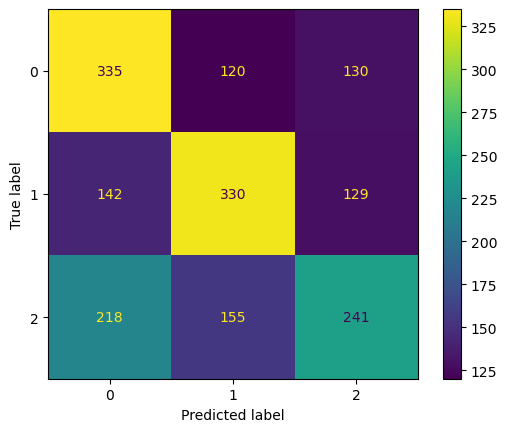

In [48]:
print("Accuracy for Gradient Boosted Tree ",accuracy_score(y_test_Scale,pred_gbt_scale))
ConfusionMatrixDisplay.from_predictions(y_test_Scale, pred_gbt_scale)
plt.show()

# DEEP LEARNING 

# 1. Data Preprocessing and Feature Extraction

In [2]:

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report
import collections
import imblearn # for over sampling data

In [2]:
Entire_data = pd.read_csv('icml_face_data.csv',header=0)
Entire_data.head(5)

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [3]:
Entire_data[' Usage'].unique()

array(['Training', 'PublicTest', 'PrivateTest'], dtype=object)

## Emotion Maping

In [4]:
# {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

new_emotions={0:'uncomfortable', 1:'uncomfortable',2:'uncomfortable',
              3:'comfortable', 4:'uncomfortable', 5:'comfortable', 6:'neutral'}

In [5]:
Entire_data['new_emotion'] = Entire_data['emotion'].replace(new_emotions)

<Axes: xlabel='new_emotion'>

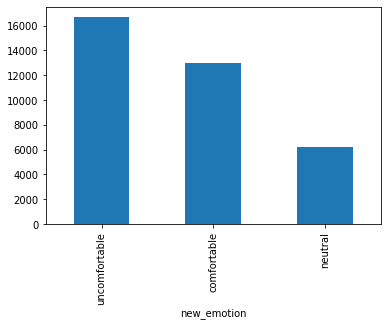

In [6]:
Entire_data['new_emotion'].value_counts().plot(kind='bar')

In [7]:
new_emotion_code={'neutral':0,'comfortable':1,'uncomfortable':2}
Entire_data['emotion_code']= Entire_data['new_emotion'].map(new_emotion_code)
Entire_data.head()

,emotion,Usage,pixels,new_emotion,emotion_code
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,uncomfortable,2
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...,uncomfortable,2
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...,uncomfortable,2
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,uncomfortable,2
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,neutral,0


## Data Sub-Sample

In [8]:
c2 = Entire_data[Entire_data['emotion_code'] == 2]
c1 = Entire_data[Entire_data['emotion_code'] == 1]
c0 = Entire_data[Entire_data['emotion_code'] == 0]

In [9]:
np.random.seed(123)
C_2 = c2.sample(3000)
C_1 = c1.sample(3000)
C_0 = c0.sample(3000)

In [10]:
Entire_data = pd.concat([C_0,C_1,C_2], axis=0)
Entire_data = pd.DataFrame(Entire_data)
Entire_data

,emotion,Usage,pixels,new_emotion,emotion_code
2062,6,Training,77 78 78 80 81 84 84 84 84 84 83 84 82 82 84 8...,neutral,0
26885,6,Training,103 111 135 115 73 105 158 156 160 163 171 181...,neutral,0
14887,6,Training,74 54 56 22 30 64 76 66 72 80 86 97 117 159 17...,neutral,0
25516,6,Training,165 143 39 23 20 14 17 18 11 23 26 12 9 10 9 7...,neutral,0
26839,6,Training,253 253 253 253 251 252 240 205 183 203 213 21...,neutral,0
...,...,...,...,...,...
11482,4,Training,146 154 160 168 90 63 61 59 86 107 110 90 74 6...,uncomfortable,2
17626,2,Training,54 64 47 33 28 29 56 59 74 89 96 103 114 130 1...,uncomfortable,2
29918,2,PublicTest,153 166 191 185 175 123 137 126 184 194 177 16...,uncomfortable,2
25717,1,Training,53 54 57 49 38 25 26 34 54 84 90 98 113 121 13...,uncomfortable,2


<Axes: xlabel='emotion_code'>

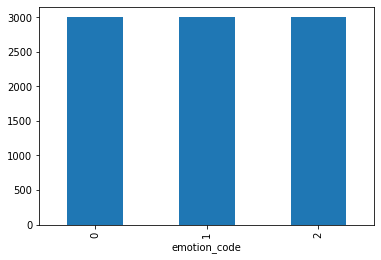

In [11]:
Entire_data['emotion_code'].value_counts().plot(kind='bar')

## Data Split

In [12]:
train_data = Entire_data[Entire_data[' Usage'] == 'Training']
train_data = train_data.reset_index(drop=True)

val_data = Entire_data[Entire_data[' Usage'] == 'PrivateTest']
val_data = val_data.reset_index(drop=True)

test_data = Entire_data[Entire_data[' Usage'] =='PublicTest']
test_data = test_data.reset_index(drop=True)

In [13]:
print(len(train_data))
print(len(test_data))
print(len(val_data))

7217
909
874


In [14]:
print('Total observations for train data: ',len(train_data))
print('Total observations for validation data: ',len(val_data))
print('Total observations for test data: ',len(test_data))

Total observations for train data:  7217
Total observations for validation data:  874
Total observations for test data:  909


In [15]:
train_data.emotion_code.value_counts()

emotion_code
0    2423
2    2411
1    2383
Name: count, dtype: int64

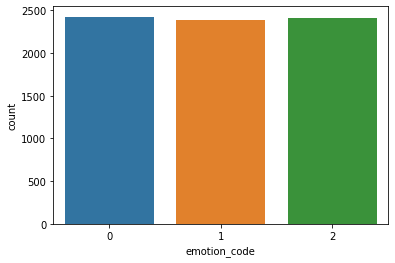

In [16]:
sns.countplot(x = train_data.emotion_code)
pyplot.show()

## Preparing Train and Test Data

In [17]:
# Function to pre process data 

def pre_process(data):
    
    pixel_array = np.zeros(shape=(len(data), 48, 48))
    # convert to array containing a list with multiple sublists (length of data)
    # Each sublist has 48 rows and 48 coloumns
    
    emotion_label = np.array(list(map(int, data['emotion_code'])))
    # extract list form of the emotion label and convert it to int
    
    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, ' pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        pixel_array[i] = image
        
    return pixel_array, emotion_label

In [18]:
# using the created function to process our data frames.

Train_data, Train_label = pre_process(train_data)
Test_data, Test_label = pre_process(test_data)
Val_data, Val_label = pre_process(val_data)


In [19]:
# reshaping the pixel dataframes in (n,48,48,1) format

Train_data = Train_data.reshape((Train_data.shape[0], 48, 48, 1))
Train_data = Train_data.astype('float32')/255

Val_data = Val_data.reshape((Val_data.shape[0], 48, 48, 1))
Val_data = Val_data.astype('float32')/255

Test_data = Test_data.reshape((Test_data.shape[0], 48, 48, 1))
Test_data = Test_data.astype('float32')/255

In [20]:
from keras.utils import to_categorical 
# to_categorical() function used to change emotion label into matrix of binary values

Train_label = to_categorical(Train_label)
Val_label = to_categorical(Val_label)
Test_label = to_categorical(Test_label)

In [24]:
# declare emotions attribute list 

emotions = {0: 'Neutral', 1: 'Comfortable', 2: 'Uncomfortable'}


## Example Image Plots

In [246]:
# plotting examples of images from each emotion set

def images(label=0):
    fig, axs = plt.subplots(1, 5, figsize=(25, 12))
    fig.subplots_adjust(hspace = .2, wspace=.2)
    axs = axs.ravel()
    for i in range(5):
        ind = train_data[train_data['emotion_code']==label].index[i]
        axs[i].imshow(Train_data[ind][:,:,0], cmap='gray')
        axs[i].set_title(emotions[Train_label[ind].argmax()])
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])

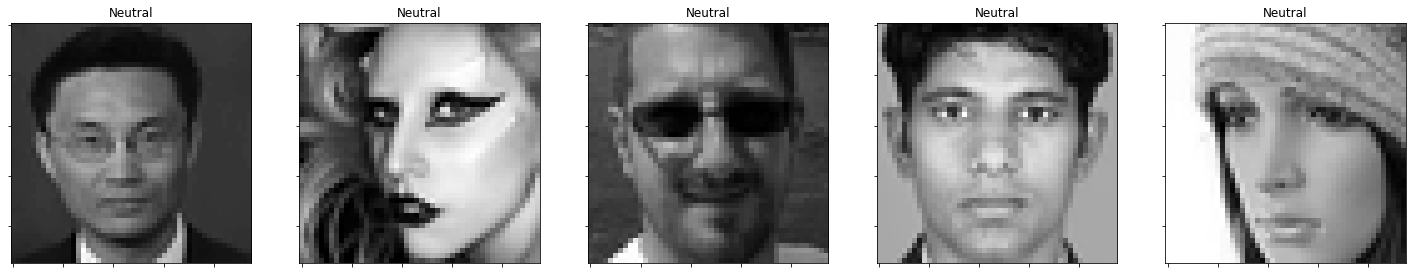

In [247]:
# plotting examples images from each emotion profile

images(label=0)

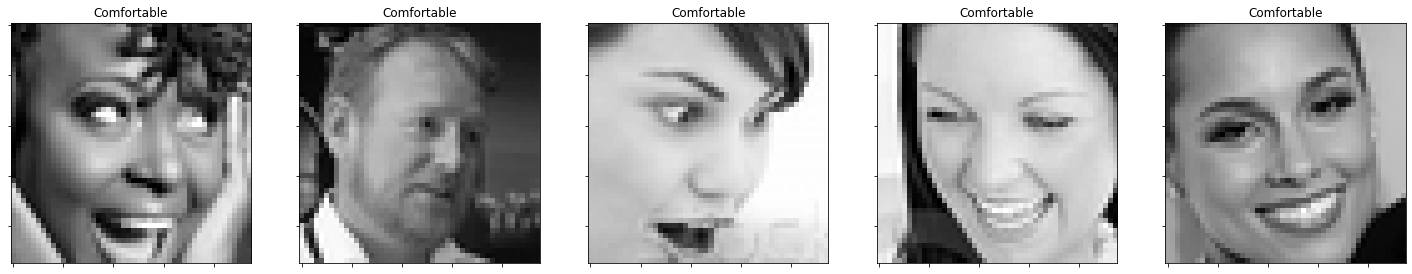

In [248]:
images(label=1)

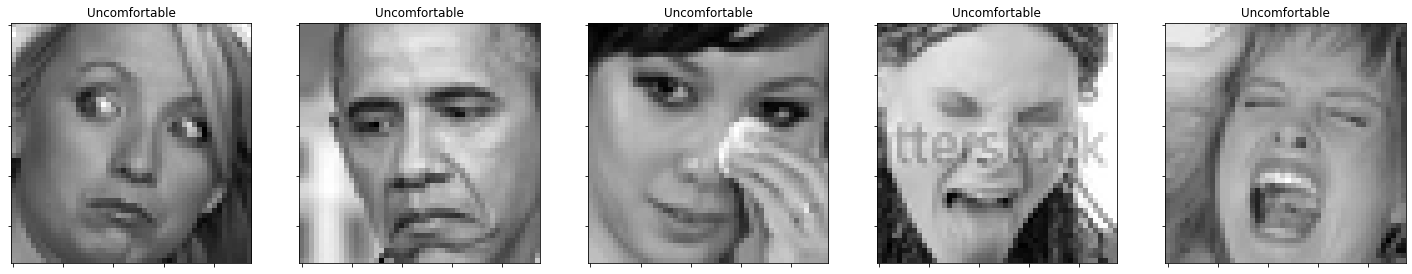

In [249]:
images(label=2)

## Deep Learning Model

In [3]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop, Adam

### Callback Function

In [222]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

def callbackFunction(modelName):
  checkpoint = ModelCheckpoint(f"Checkpoints/{modelName}.h5", monitor = "val_accuracy", save_best_only = True, mode = "auto", verbose = 1)
  early_stopping = EarlyStopping(monitor = "val_accuracy", patience = 8, verbose = 1)
  reduce_lr = ReduceLROnPlateau(monitor="val_accuracy", factor=0.2, patience=4, min_lr=0.00001)  
  callbacks = [early_stopping, checkpoint, reduce_lr]
  return callbacks


### Class Weight

In [33]:
# calculate class weights for the emotion labels

class_weight = dict(zip(range(0, 3), (((train_data['emotion_code'].value_counts()).sort_index())/len(train_data['emotion_code'])).to_list()))

class_weight


{0: 0.33573506997367325, 1: 0.33019260080365803, 2: 0.3340723292226687}

### 1. Custom Model 1

In [38]:
#np.random.seed(1)
#tf.random.set_seed(1)


model1 = models.Sequential()

model1.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)))
model1.add(MaxPool2D((2, 2)))

model1.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model1.add(MaxPool2D((2, 2)))

model1.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model1.add(MaxPool2D((2, 2)))

model1.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model1.add(MaxPool2D((2, 2)))

model1.add(Flatten())

model1.add(Dense(256, activation='relu'))

model1.add(Dense(128, activation='relu'))

model1.add(Dense(3, activation='softmax'))

2023-05-04 16:08:38.544906: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [39]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

In [156]:
model1.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])


In [157]:
history1 = model1.fit(Train_data, Train_label,
                    validation_data=(Val_data, Val_label),
                    callbacks=callbackFunction('Case_1'),
                    class_weight = class_weight,
                    epochs=50,
                    batch_size=64)

Epoch 1/50
113/113 [==============================] - ETA: 0s - loss: 0.3663 - accuracy: 0.3382
Epoch 1: val_accuracy improved from -inf to 0.32494, saving model to Checkpoints/Case_1.h5
113/113 [==============================] - 42s 365ms/step - loss: 0.3663 - accuracy: 0.3382 - val_loss: 1.0999 - val_accuracy: 0.3249
Epoch 2/50
113/113 [==============================] - ETA: 0s - loss: 0.3643 - accuracy: 0.3709
Epoch 2: val_accuracy improved from 0.32494 to 0.38330, saving model to Checkpoints/Case_1.h5
113/113 [==============================] - 41s 364ms/step - loss: 0.3643 - accuracy: 0.3709 - val_loss: 1.0855 - val_accuracy: 0.3833
Epoch 3/50
113/113 [==============================] - ETA: 0s - loss: 0.3580 - accuracy: 0.4119
Epoch 3: val_accuracy improved from 0.38330 to 0.46453, saving model to Checkpoints/Case_1.h5
113/113 [==============================] - 41s 362ms/step - loss: 0.3580 - accuracy: 0.4119 - val_loss: 1.0382 - val_accuracy: 0.4645
Epoch 4/50
113/113 [===========

In [175]:
train_loss, train_acc = model1.evaluate(Train_data, Train_label)
print('Training Accuracy:', train_acc*100)
print('\n')

test_loss, test_acc = model1.evaluate(Test_data, Test_label)
print('Testing Accuracy:', test_acc*100)
print('\n')

val_loss, val_acc = model1.evaluate(Val_data, Val_label)
print('Validation Accuracy:', val_acc*100)

226/226 [==============================] - 10s 42ms/step - loss: 0.0492 - accuracy: 0.9832
Training Accuracy: 98.32340478897095


29/29 [==============================] - 2s 61ms/step - loss: 3.7234 - accuracy: 0.5523
Testing Accuracy: 55.22552132606506


28/28 [==============================] - 2s 66ms/step - loss: 3.1291 - accuracy: 0.5950
Validation Accuracy: 59.49656963348389


In [173]:
pred_test_labels1 = model1.predict(Test_data)

29/29 [==============================] - 2s 57ms/step


In [4]:
pred_test_labels1

NameError: name 'pred_test_labels1' is not defined

#### Model Accuracy & Loss 

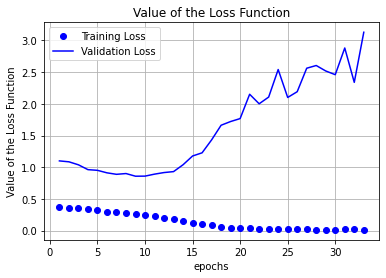

In [167]:
loss = history1.history['loss']
loss_val = history1.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, loss_val, 'b', label='Validation Loss')
plt.title('Value of the Loss Function')
plt.xlabel('epochs')
plt.ylabel('Value of the Loss Function')
plt.legend()
plt.grid()
plt.show()

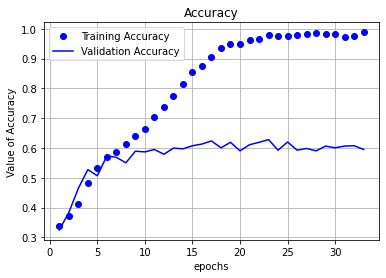

In [168]:
acc = history1.history['accuracy']
acc_val = history1.history['val_accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, acc_val, 'b', label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Value of Accuracy')
plt.legend()
plt.grid()
plt.show()

#### Confusion Matrix

In [190]:
df_compare = pd.DataFrame()
df_compare['real'] = Test_label.argmax(axis=1)
df_compare['pred'] = pred_test_labels1.argmax(axis=1)
df_compare['wrong'] = np.where(df_compare['real']!=df_compare['pred'], 1, 0)

/var/folders/_4/glgshw4s1kg4zw6r2jsb7wfh0000gn/T/ipykernel_98518/2389852407.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


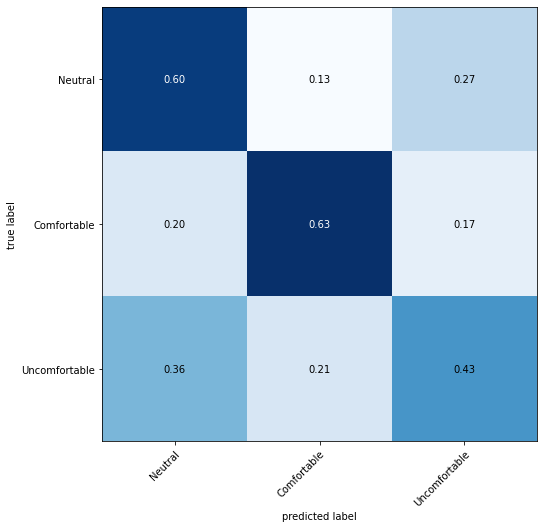

In [191]:
conf_mat = confusion_matrix(Test_label.argmax(axis=1), pred_test_labels1.argmax(axis=1))

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                class_names=emotions.values(),
                                figsize=(8, 8))
fig.show()

#### Classfication Report

In [195]:

test_pred = np.argmax(pred_test_labels1, axis = -1)

y_true_labels = np.argmax(Test_label, axis = -1)
    
print(classification_report(y_true_labels, test_pred))

              precision    recall  f1-score   support

           0       0.51      0.60      0.55       293
           1       0.66      0.63      0.64       310
           2       0.50      0.43      0.46       306

    accuracy                           0.55       909
   macro avg       0.55      0.55      0.55       909
weighted avg       0.55      0.55      0.55       909



### Custom Model 2 

In [40]:
#np.random.seed(1)
#tf.random.set_seed(1)


model3 = models.Sequential()

model3.add(Conv2D(64, (1, 1), padding='same', activation='relu', input_shape=(48, 48, 1)))
model3.add(BatchNormalization())
model3.add(Dropout(0.25))

model3.add(Conv2D(128, (3, 3),padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.25))

model3.add(Conv2D(256, (5, 5),padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D((2, 2),padding="same"))
model3.add(Dropout(0.25))


model3.add(Flatten())

model3.add(Dense(128))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(Dropout(0.25))

model3.add(Dense(256))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(Dropout(0.25))

model3.add(Dense(3, activation='softmax'))

In [41]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        128       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 48, 48, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 48, 48, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 128)      512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 48, 48, 128)      

In [42]:
model3.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])


In [183]:
history3 = model3.fit(Train_data, Train_label,
                    validation_data=(Val_data, Val_label),
                    callbacks=callbackFunction('Case_3'),
                    class_weight = class_weight,
                    epochs=50,
                    batch_size=64)

Epoch 1/50
113/113 [==============================] - ETA: 0s - loss: 0.4041 - accuracy: 0.3946 
Epoch 1: val_accuracy improved from -inf to 0.34096, saving model to Checkpoints/Case_3.h5
113/113 [==============================] - 1580s 14s/step - loss: 0.4041 - accuracy: 0.3946 - val_loss: 1.1260 - val_accuracy: 0.3410
Epoch 2/50
113/113 [==============================] - ETA: 0s - loss: 0.3640 - accuracy: 0.4513 
Epoch 2: val_accuracy did not improve from 0.34096
113/113 [==============================] - 1615s 14s/step - loss: 0.3640 - accuracy: 0.4513 - val_loss: 1.1659 - val_accuracy: 0.3249
Epoch 3/50
113/113 [==============================] - ETA: 0s - loss: 0.3364 - accuracy: 0.5010 
Epoch 3: val_accuracy improved from 0.34096 to 0.47025, saving model to Checkpoints/Case_3.h5
113/113 [==============================] - 1684s 15s/step - loss: 0.3364 - accuracy: 0.5010 - val_loss: 1.0339 - val_accuracy: 0.4703
Epoch 4/50
113/113 [==============================] - ETA: 0s - loss: 0

In [184]:
train_loss, train_acc = model3.evaluate(Train_data, Train_label)
print('Training Accuracy:', train_acc*100)
print('\n')

test_loss, test_acc = model3.evaluate(Test_data, Test_label)
print('Testing Accuracy:', test_acc*100)
print('\n')

val_loss, val_acc = model3.evaluate(Val_data, Val_label)
print('Validation Accuracy:', val_acc*100)

226/226 [==============================] - 455s 2s/step - loss: 0.0077 - accuracy: 0.9983
Training Accuracy: 99.83372688293457


29/29 [==============================] - 57s 2s/step - loss: 2.0788 - accuracy: 0.5842
Testing Accuracy: 58.415842056274414


28/28 [==============================] - 55s 2s/step - loss: 1.7628 - accuracy: 0.6064
Validation Accuracy: 60.64073443412781


In [185]:
pred_test_labels3 = model3.predict(Test_data)

29/29 [==============================] - 57s 2s/step


In [189]:
pred_test_labels3

array([[6.48124889e-02, 9.17586327e-01, 1.76012311e-02],
       [3.18918414e-02, 8.02114664e-05, 9.68027949e-01],
       [9.85324800e-01, 1.46747455e-02, 4.22574118e-07],
       ...,
       [1.15009281e-03, 4.94120922e-03, 9.93908644e-01],
       [7.05784769e-05, 8.72526705e-01, 1.27402708e-01],
       [1.30476067e-02, 6.11497283e-01, 3.75455052e-01]], dtype=float32)

#### Model Accuracy & Loss

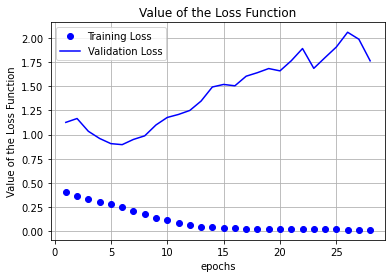

In [187]:
loss = history3.history['loss']
loss_val = history3.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, loss_val, 'b', label='Validation Loss')
plt.title('Value of the Loss Function')
plt.xlabel('epochs')
plt.ylabel('Value of the Loss Function')
plt.legend()
plt.grid()
plt.show()

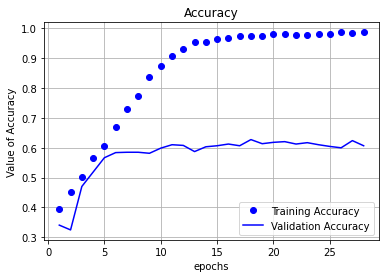

In [188]:
acc = history3.history['accuracy']
acc_val = history3.history['val_accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, acc_val, 'b', label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Value of Accuracy')
plt.legend()
plt.grid()
plt.show()

#### Confusion Matrix

In [192]:
df_compare = pd.DataFrame()
df_compare['real'] = Test_label.argmax(axis=1)
df_compare['pred'] = pred_test_labels3.argmax(axis=1)
df_compare['wrong'] = np.where(df_compare['real']!=df_compare['pred'], 1, 0)

/var/folders/_4/glgshw4s1kg4zw6r2jsb7wfh0000gn/T/ipykernel_98518/2839158568.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


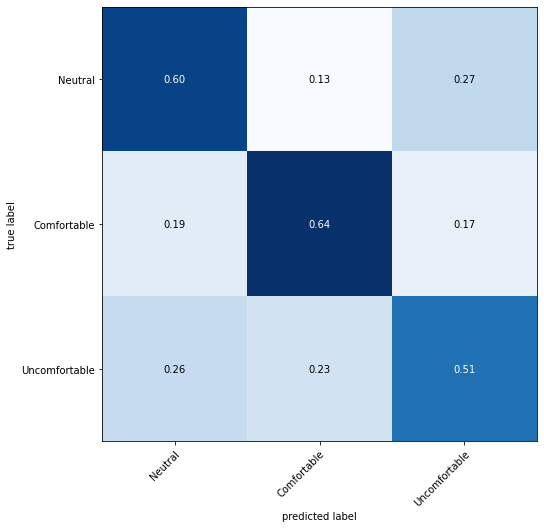

In [193]:
conf_mat = confusion_matrix(Test_label.argmax(axis=1), pred_test_labels3.argmax(axis=1))

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                class_names=emotions.values(),
                                figsize=(8, 8))
fig.show()

#### Classification Report

In [196]:
test_pred = np.argmax(pred_test_labels3, axis = -1)

y_true_labels = np.argmax(Test_label, axis = -1)
    
print(classification_report(y_true_labels, test_pred))

              precision    recall  f1-score   support

           0       0.56      0.60      0.58       293
           1       0.64      0.64      0.64       310
           2       0.55      0.51      0.53       306

    accuracy                           0.58       909
   macro avg       0.58      0.58      0.58       909
weighted avg       0.58      0.58      0.58       909



### Custom Model 3 (Best)

In [225]:

model7 = models.Sequential()

model7.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)))
model7.add(BatchNormalization())
model7.add(Dropout(0.35))

model7.add(Conv2D(128, (3, 3),padding='same', activation='relu'))
model7.add(MaxPool2D((2, 2),padding="same"))
model7.add(BatchNormalization())
model7.add(Dropout(0.25))

model7.add(Conv2D(256, (5, 5),padding='same', activation='relu'))
model7.add(BatchNormalization())
model7.add(Dropout(0.35))

model7.add(Conv2D(512, (3, 3),padding='same', activation='relu'))
model7.add(MaxPool2D((2, 2),padding="same"))
model7.add(BatchNormalization())
model7.add(Dropout(0.30))

model7.add(Flatten())

model7.add(Dense(128, activation='relu'))
model7.add(BatchNormalization())
model7.add(Dropout(0.25))

model7.add(Dense(64, activation='relu'))
model7.add(BatchNormalization())
model7.add(Dropout(0.25))

model7.add(Dense(3, activation='softmax'))

In [226]:
model7.summary()

Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_348 (Conv2D)         (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_368 (Ba  (None, 48, 48, 64)       256       
 tchNormalization)                                               
                                                                 
 dropout_371 (Dropout)       (None, 48, 48, 64)        0         
                                                                 
 conv2d_349 (Conv2D)         (None, 48, 48, 128)       73856     
                                                                 
 max_pooling2d_171 (MaxPooli  (None, 24, 24, 128)      0         
 ng2D)                                                           
                                                                 
 batch_normalization_369 (Ba  (None, 24, 24, 128)    

In [227]:
model7.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [228]:
# image generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
)
train_datagen.fit(Train_data)

In [232]:
history7 = model7.fit(train_datagen.flow(Train_data, Train_label, batch_size=32),
                    validation_data=(Val_data, Val_label),
                    steps_per_epoch=len(Train_data) / 32,
                    callbacks=callbackFunction('Case_7'),
                    class_weight = class_weight,
                    epochs=80,
                    batch_size=32
                     )

Epoch 1/80
226/225 [==============================] - ETA: 0s - loss: 0.4263 - accuracy: 0.3618
Epoch 1: val_accuracy improved from -inf to 0.32609, saving model to Checkpoints/Case_7.h5
225/225 [==============================] - 390s 2s/step - loss: 0.4263 - accuracy: 0.3618 - val_loss: 1.1217 - val_accuracy: 0.3261 - lr: 0.0010
Epoch 2/80
226/225 [==============================] - ETA: 0s - loss: 0.3875 - accuracy: 0.3790
Epoch 2: val_accuracy improved from 0.32609 to 0.33867, saving model to Checkpoints/Case_7.h5
225/225 [==============================] - 442s 2s/step - loss: 0.3875 - accuracy: 0.3790 - val_loss: 1.1778 - val_accuracy: 0.3387 - lr: 0.0010
Epoch 3/80
226/225 [==============================] - ETA: -1s - loss: 0.3761 - accuracy: 0.3820
Epoch 3: val_accuracy improved from 0.33867 to 0.41533, saving model to Checkpoints/Case_7.h5
225/225 [==============================] - 539s 2s/step - loss: 0.3761 - accuracy: 0.3820 - val_loss: 1.0684 - val_accuracy: 0.4153 - lr: 0.00

In [233]:
train_loss, train_acc = model7.evaluate(Train_data, Train_label)
print('Training Accuracy:', train_acc*100)
print('\n')

test_loss, test_acc = model7.evaluate(Test_data, Test_label)
print('Testing Accuracy:', test_acc*100)
print('\n')

val_loss, val_acc = model7.evaluate(Val_data, Val_label)
print('Validation Accuracy:', val_acc*100)

226/226 [==============================] - 113s 499ms/step - loss: 0.4791 - accuracy: 0.8024
Training Accuracy: 80.24109601974487


29/29 [==============================] - 15s 514ms/step - loss: 0.6691 - accuracy: 0.7217
Testing Accuracy: 72.16721773147583


28/28 [==============================] - 14s 515ms/step - loss: 0.5733 - accuracy: 0.7540
Validation Accuracy: 75.40045976638794


In [234]:
pred_test_labels7 = model7.predict(Test_data)

29/29 [==============================] - 15s 521ms/step


In [235]:
pred_test_labels7

array([[1.6944705e-01, 1.1645089e-02, 8.1890786e-01],
       [9.4946682e-01, 3.4418382e-02, 1.6114801e-02],
       [9.4429427e-01, 2.8755512e-02, 2.6950153e-02],
       ...,
       [4.5692638e-02, 5.6188554e-03, 9.4868845e-01],
       [5.9076956e-05, 2.3148495e-03, 9.9762613e-01],
       [6.0230166e-01, 1.1820755e-02, 3.8587758e-01]], dtype=float32)

#### Model Accuracy & Loss

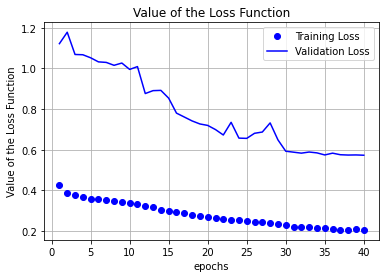

In [236]:
loss = history7.history['loss']
loss_val = history7.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, loss_val, 'b', label='Validation Loss')
plt.title('Value of the Loss Function')
plt.xlabel('epochs')
plt.ylabel('Value of the Loss Function')
plt.legend()
plt.grid()
plt.show()

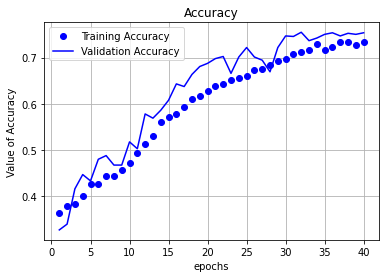

In [237]:
acc = history7.history['accuracy']
acc_val = history7.history['val_accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, acc_val, 'b', label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Value of Accuracy')
plt.legend()
plt.grid()
plt.show()

#### Confusion Matrix

In [243]:
df_compare = pd.DataFrame()
df_compare['real'] = Test_label.argmax(axis=1)
df_compare['pred'] = pred_test_labels7.argmax(axis=1)
df_compare['wrong'] = np.where(df_compare['real']!=df_compare['pred'], 1, 0)

/var/folders/_4/glgshw4s1kg4zw6r2jsb7wfh0000gn/T/ipykernel_99812/2965285105.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


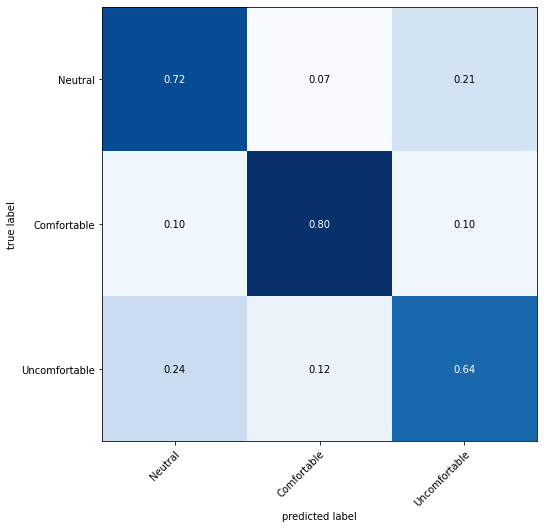

In [244]:
conf_mat = confusion_matrix(Test_label.argmax(axis=1), pred_test_labels7.argmax(axis=1))

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                class_names=emotions.values(),
                                figsize=(8, 8))
fig.show()

#### Classification Report

In [245]:

test_pred = np.argmax(pred_test_labels7, axis = -1)

y_true_labels = np.argmax(Test_label, axis = -1)
    
print(classification_report(y_true_labels, test_pred))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69       293
           1       0.81      0.80      0.81       310
           2       0.68      0.64      0.66       306

    accuracy                           0.72       909
   macro avg       0.72      0.72      0.72       909
weighted avg       0.72      0.72      0.72       909



### CUSTOM MODEL 4

In [238]:
#np.random.seed(1)
#tf.random.set_seed(1)


model4 = models.Sequential()

model4.add(Conv2D(64, (3, 3), padding='same', activation='elu', input_shape=(48, 48, 1)))
model4.add(MaxPool2D((2, 2),padding="same"))
model4.add(Dropout(0.25))
model4.add(BatchNormalization())

model4.add(Conv2D(128, (5, 5),padding='same', activation='elu'))
model4.add(MaxPool2D((2, 2),padding="same"))
model4.add(Dropout(0.35))
model4.add(BatchNormalization())


model4.add(Conv2D(256, (3, 3),padding='same', activation='elu'))
model4.add(Conv2D(256, (5, 5),padding='same', activation='elu'))
model4.add(MaxPool2D((2, 2),padding="same"))
model4.add(Dropout(0.35))
model4.add(BatchNormalization())

model4.add(Conv2D(512, (3, 3),padding='same', activation='elu'))
model4.add(MaxPool2D((2, 2),padding="same"))
model4.add(Dropout(0.30))
model4.add(BatchNormalization())

model4.add(Flatten())

model4.add(Dense(512))
model4.add(Activation('elu'))
model4.add(Dropout(0.30))
model4.add(BatchNormalization())

model4.add(Dense(256))
model4.add(Activation('elu'))
model4.add(Dropout(0.30))
model4.add(BatchNormalization())

model4.add(Dense(128))
model4.add(Activation('elu'))
model4.add(Dropout(0.30))
model4.add(BatchNormalization())

model4.add(Dense(3, activation='softmax'))

In [239]:
model4.summary()

Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_352 (Conv2D)         (None, 48, 48, 64)        640       
                                                                 
 max_pooling2d_173 (MaxPooli  (None, 24, 24, 64)       0         
 ng2D)                                                           
                                                                 
 dropout_377 (Dropout)       (None, 24, 24, 64)        0         
                                                                 
 batch_normalization_374 (Ba  (None, 24, 24, 64)       256       
 tchNormalization)                                               
                                                                 
 conv2d_353 (Conv2D)         (None, 24, 24, 128)       204928    
                                                                 
 max_pooling2d_174 (MaxPooli  (None, 12, 12, 128)    

In [241]:
# image generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
)

train_datagen.fit(Train_data)

model4.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [35]:
history4 = model4.fit_generator(
    train_datagen.flow(Train_data, Train_label, batch_size=32),
    validation_data=(Val_data, Val_label),
    steps_per_epoch=len(Train_data) / 32,
    epochs=80,
    callbacks=callbackFunction('Case_4')
)

/var/folders/xy/2d4b3t611bdfmrpxj0kwybk00000gn/T/ipykernel_16820/3455590792.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history4 = model4.fit_generator(


Epoch 1/80
226/225 [==============================] - ETA: 0s - loss: 1.2857 - accuracy: 0.3514
Epoch 1: val_accuracy improved from -inf to 0.34325, saving model to Checkpoints/Case_4.h5
225/225 [==============================] - 153s 674ms/step - loss: 1.2857 - accuracy: 0.3514 - val_loss: 1.1155 - val_accuracy: 0.3432 - lr: 0.0010
Epoch 2/80
226/225 [==============================] - ETA: 0s - loss: 1.1707 - accuracy: 0.3557
Epoch 2: val_accuracy improved from 0.34325 to 0.37986, saving model to Checkpoints/Case_4.h5
225/225 [==============================] - 161s 713ms/step - loss: 1.1707 - accuracy: 0.3557 - val_loss: 1.1011 - val_accuracy: 0.3799 - lr: 0.0010
Epoch 3/80
226/225 [==============================] - ETA: 0s - loss: 1.1369 - accuracy: 0.3574
Epoch 3: val_accuracy improved from 0.37986 to 0.40046, saving model to Checkpoints/Case_4.h5
225/225 [==============================] - 167s 743ms/step - loss: 1.1369 - accuracy: 0.3574 - val_loss: 1.0891 - val_accuracy: 0.4005 - 

In [36]:
train_loss, train_acc = model4.evaluate(Train_data, Train_label)
print('Training Accuracy:', train_acc*100)
print('\n')

test_loss, test_acc = model4.evaluate(Test_data, Test_label)
print('Testing Accuracy:', test_acc*100)
print('\n')

val_loss, val_acc = model4.evaluate(Val_data, Val_label)
print('Validation Accuracy:', val_acc*100)

226/226 [==============================] - 46s 205ms/step - loss: 0.3822 - accuracy: 0.8548
Training Accuracy: 85.4787290096283


29/29 [==============================] - 6s 205ms/step - loss: 0.7157 - accuracy: 0.7063
Testing Accuracy: 70.62706351280212


28/28 [==============================] - 6s 205ms/step - loss: 0.5752 - accuracy: 0.7849
Validation Accuracy: 78.48970293998718


In [37]:
pred_test_labels4 = model4.predict(Test_data)

29/29 [==============================] - 6s 206ms/step


In [39]:
pred_test_labels4

array([[4.9825647e-01, 2.9551400e-02, 4.7219208e-01],
       [9.0018594e-01, 2.7691131e-02, 7.2122827e-02],
       [7.4050611e-01, 1.0177856e-01, 1.5771531e-01],
       ...,
       [5.6571835e-03, 1.0492695e-02, 9.8385012e-01],
       [6.5711763e-04, 3.3253897e-03, 9.9601752e-01],
       [6.9940400e-01, 9.8234685e-03, 2.9077253e-01]], dtype=float32)

#### Model Accuracy & Loss

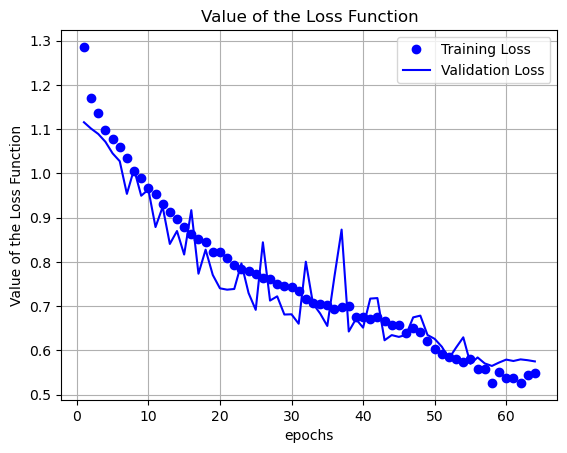

In [40]:
loss = history4.history['loss']
loss_val = history4.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, loss_val, 'b', label='Validation Loss')
plt.title('Value of the Loss Function')
plt.xlabel('epochs')
plt.ylabel('Value of the Loss Function')
plt.legend()
plt.grid()
plt.show()

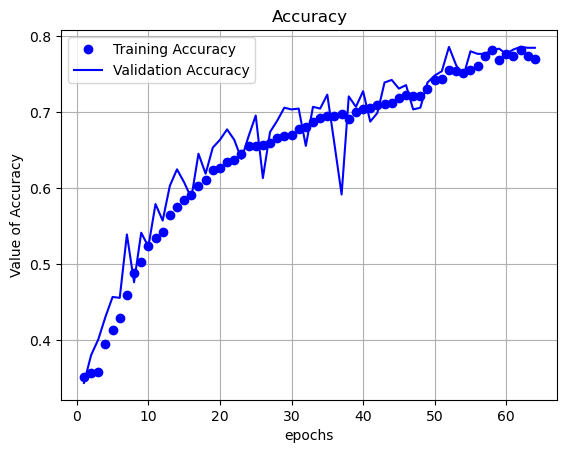

In [41]:
acc = history4.history['accuracy']
acc_val = history4.history['val_accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, acc_val, 'b', label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Value of Accuracy')
plt.legend()
plt.grid()
plt.show()

#### Confusion Matrix

In [42]:
df_compare = pd.DataFrame()
df_compare['real'] = Test_label.argmax(axis=1)
df_compare['pred'] = pred_test_labels4.argmax(axis=1)
df_compare['wrong'] = np.where(df_compare['real']!=df_compare['pred'], 1, 0)

/var/folders/xy/2d4b3t611bdfmrpxj0kwybk00000gn/T/ipykernel_16820/3361775547.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


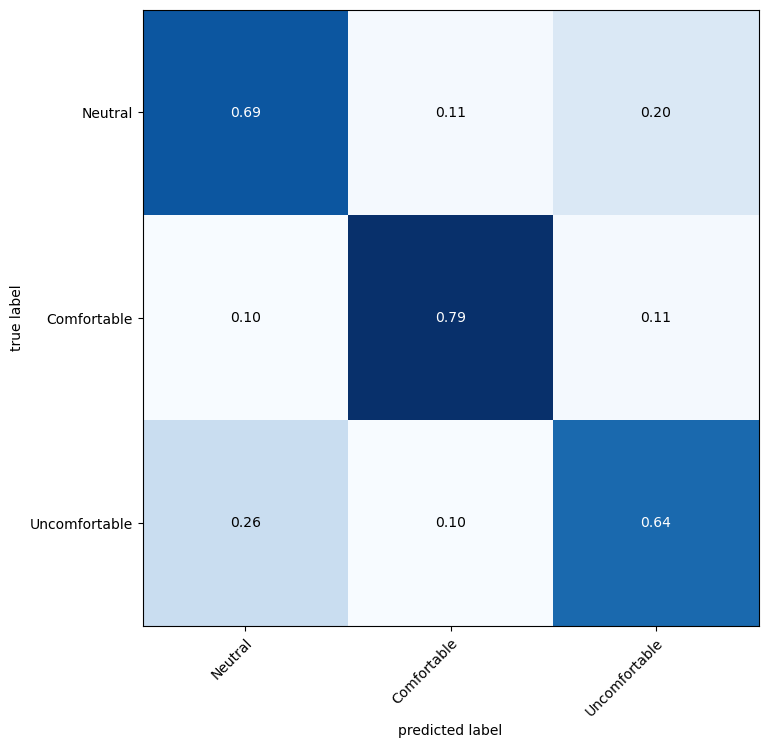

In [43]:
conf_mat = confusion_matrix(Test_label.argmax(axis=1), pred_test_labels4.argmax(axis=1))

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                class_names=emotions.values(),
                                figsize=(8, 8))
fig.show()

#### Classification Report

In [44]:

test_pred = np.argmax(pred_test_labels4, axis = -1)

y_true_labels = np.argmax(Test_label, axis = -1)
    
print(classification_report(y_true_labels, test_pred))

              precision    recall  f1-score   support

           0       0.65      0.69      0.67       293
           1       0.80      0.79      0.79       310
           2       0.68      0.64      0.66       306

    accuracy                           0.71       909
   macro avg       0.71      0.71      0.71       909
weighted avg       0.71      0.71      0.71       909



## Prediction Plots

In [250]:
def plot_image_and_emotion(Test_data, Test_label, pred_test_labels7, image_number):
    """ Function to plot the image and compare the prediction results with the label """
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=False)
    
    bar_label = emotions.values()
    
    axs[0].imshow(Test_data[image_number], 'gray')
    axs[0].set_title(emotions[Test_label.argmax(axis=1)[image_number]])
    
    axs[1].bar(bar_label, pred_test_labels7[image_number], color='orange', alpha=0.7)
    axs[1].grid()
    
    plt.show()

## Correct Predictions

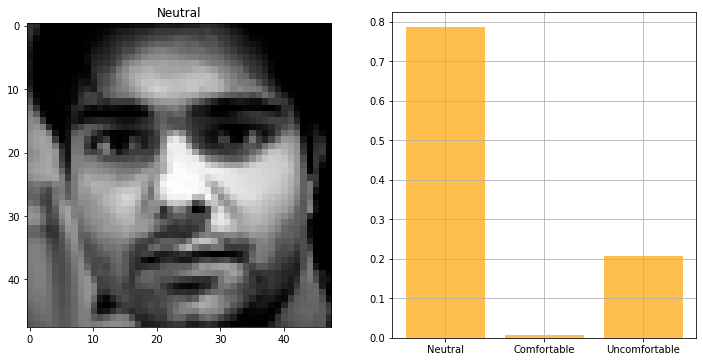

index is 12


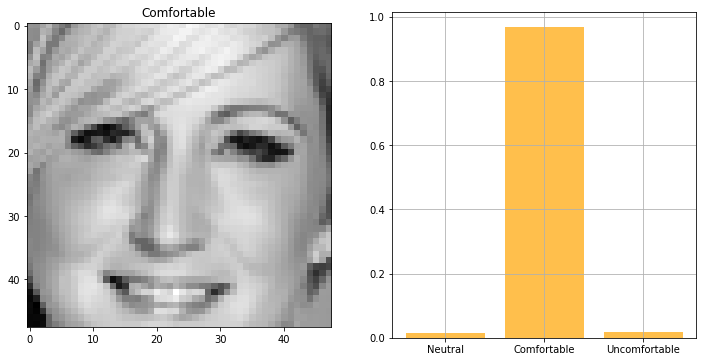

index is 449


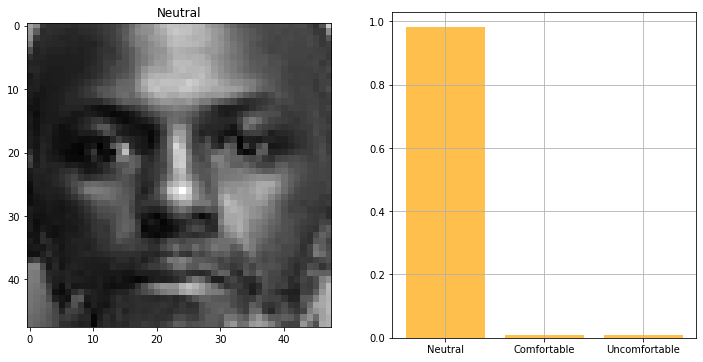

index is 10


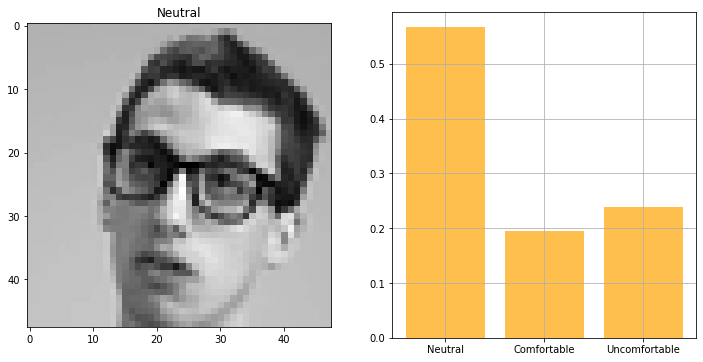

index is 11


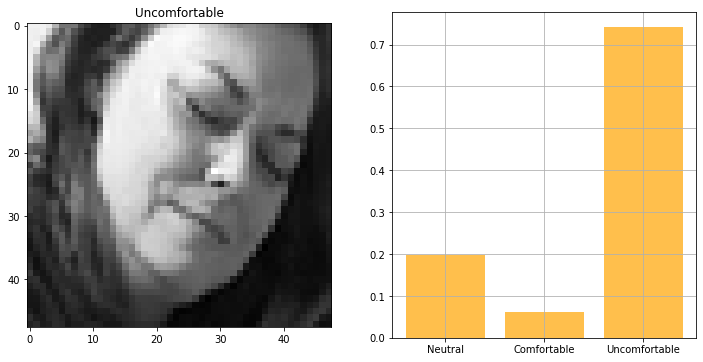

index is 866


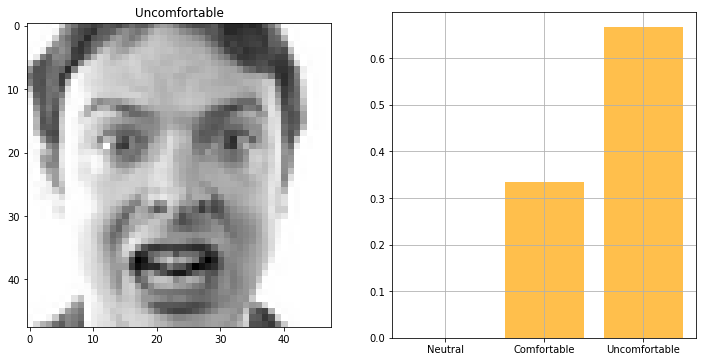

index is 861


In [262]:
for i in [12, 449, 10, 11, 866, 861]:
    plot_image_and_emotion(Test_data, Test_label, pred_test_labels7, i)
    print("index is",i)

## Wrong Predictions with issues in images
### - Angle of picture


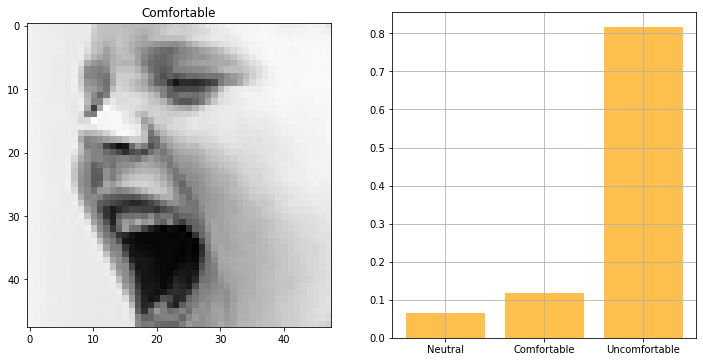

index is 399


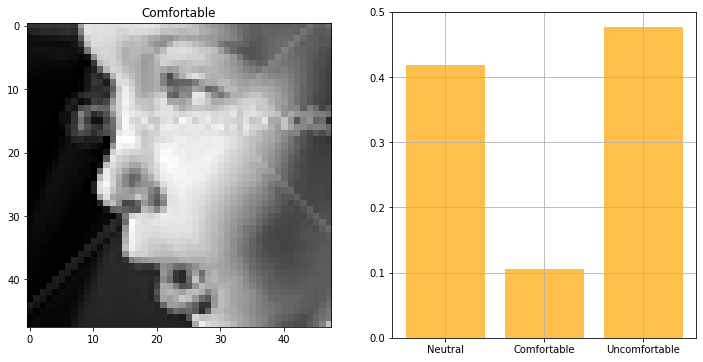

index is 412


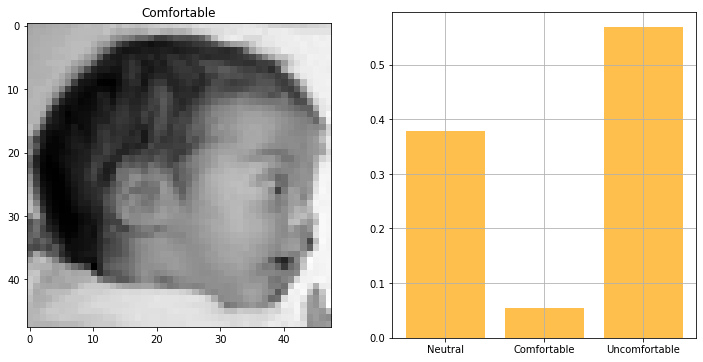

index is 558


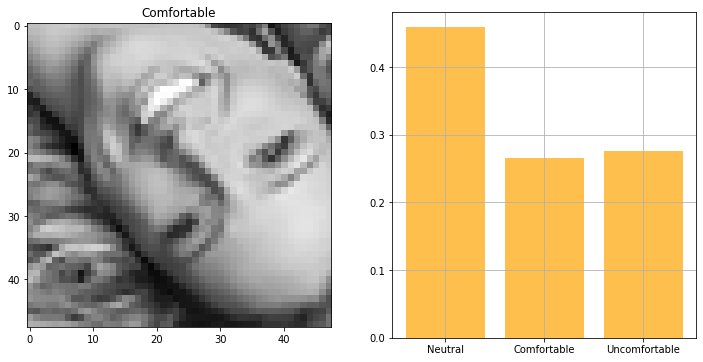

index is 569


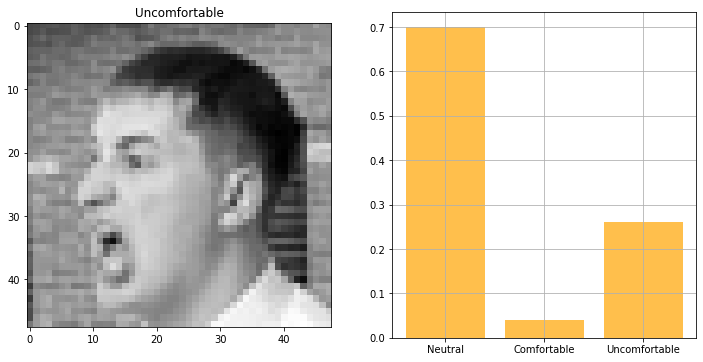

index is 643


In [259]:
for i in [399, 412, 558, 569, 643]:
    plot_image_and_emotion(Test_data, Test_label, pred_test_labels7, i)
    print("index is",i)

### - Watermarks


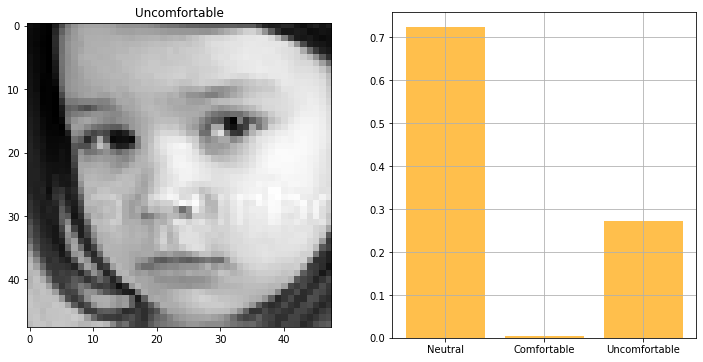

index is 623


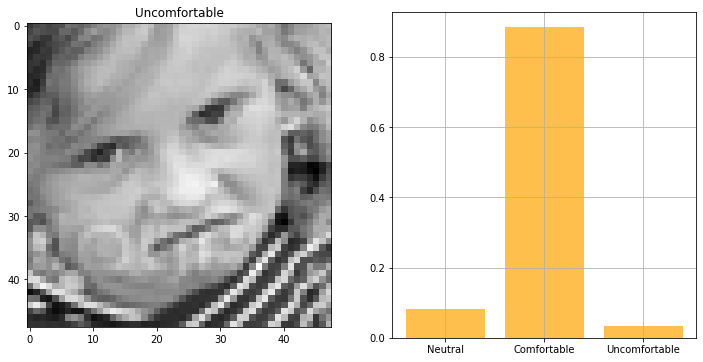

index is 642


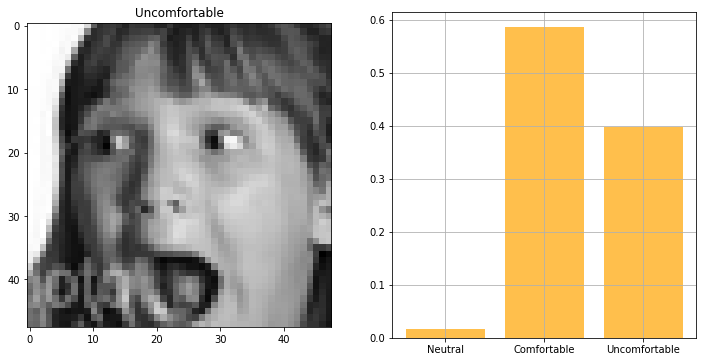

index is 662


In [260]:
for i in [623, 642, 662]:
    plot_image_and_emotion(Test_data, Test_label, pred_test_labels7, i)
    print("index is",i)

### - Wrong Labels

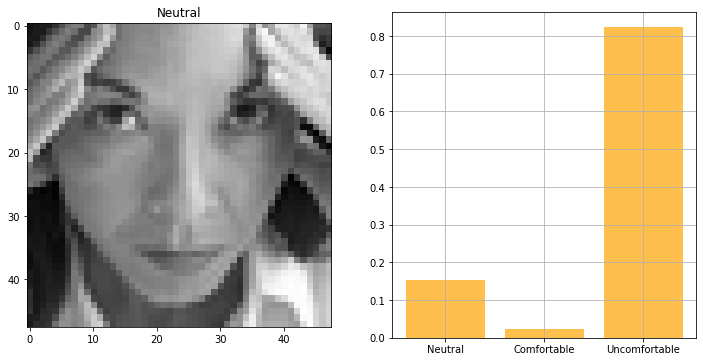

index is 27


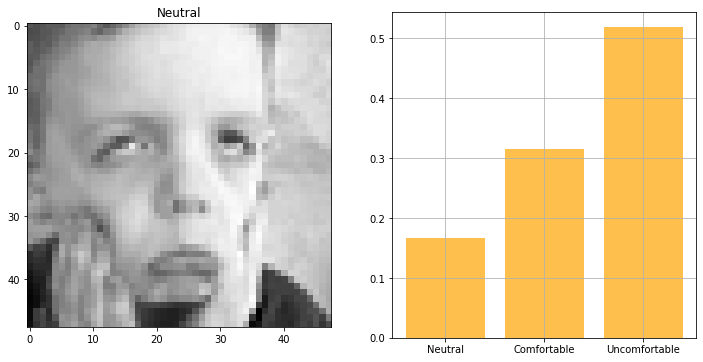

index is 29


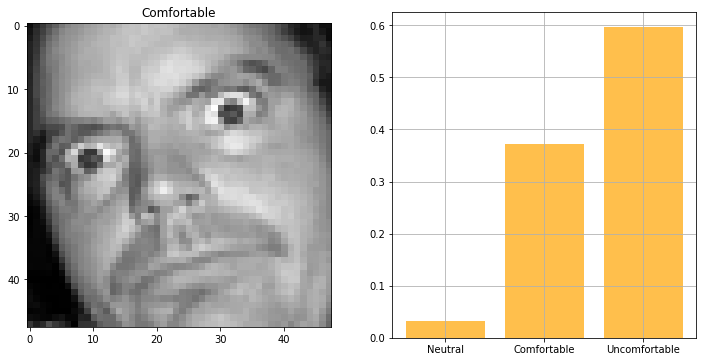

index is 305


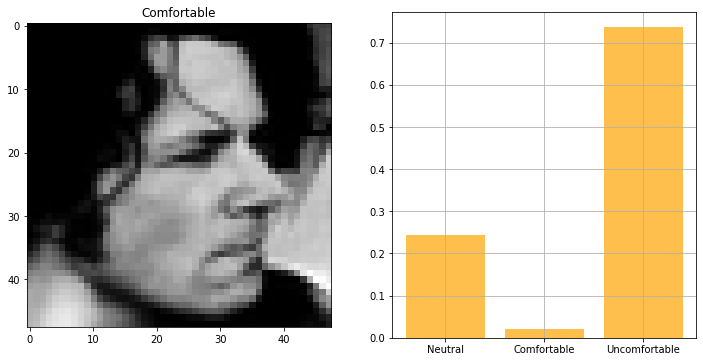

index is 494


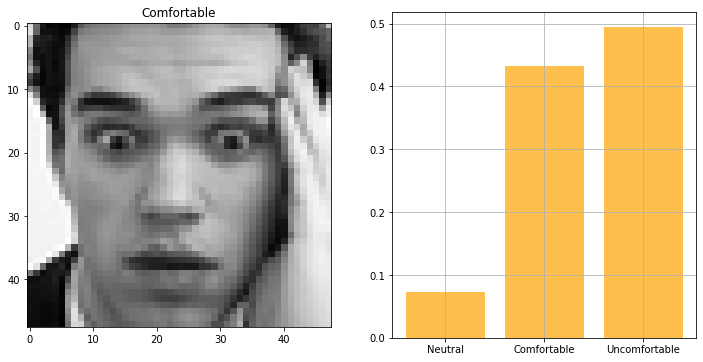

index is 510


In [261]:
for i in [27, 29, 305, 494, 510]:
    plot_image_and_emotion(Test_data, Test_label, pred_test_labels7, i)
    print("index is",i)